# **Predicting Gallstone Disease Using Decision Tree Modeling on Clinical Data**

Gallstone disease occurs when solid particles, called gallstones, form in the gallbladder, a small organ that stores bile. Gallstones can block bile flow, leading to pain, inflammation, infection, or more severe complications like pancreatitis.

Early prediction of gallstone cases helps identify high-risk patients before complications arise, enabling timely interventions and reducing the risk of serious medical events. In clinical practice, accurate prediction supports targeted treatment, optimizes resource allocation, and improves patient outcomes.

In this project, I built a decision tree model to predict gallstone presence in patients using [clinical data](https://archive.ics.uci.edu/dataset/1150/gallstone-1) from UCI.
The workflow involved inspecting and cleaning the dataset, encoding categorical
variables, defining features and target, splitting data into training and test sets, training and evaluating the model, and visualizing the decision-making process.

**Import the Libraries**

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

import matplotlib.pyplot as plt

**Load the Gallstone Dataset**

In [4]:
df = pd.read_csv("/content/gallstone.csv")

df.head()


,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


**Inspect the data**

Checked for missing values

In [5]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Gallstone Status                                319 non-null    int64  
 1   Age                                             319 non-null    int64  
 2   Gender                                          319 non-null    int64  
 3   Comorbidity                                     319 non-null    int64  
 4   Coronary Artery Disease (CAD)                   319 non-null    int64  
 5   Hypothyroidism                                  319 non-null    int64  
 6   Hyperlipidemia                                  319 non-null    int64  
 7   Diabetes Mellitus (DM)                          319 non-null    int64  
 8   Height                                          319 non-null    int64  
 9   Weight                                     

,0
Gallstone Status,0
Age,0
Gender,0
Comorbidity,0
Coronary Artery Disease (CAD),0
Hypothyroidism,0
Hyperlipidemia,0
Diabetes Mellitus (DM),0
Height,0
Weight,0


There rea no missing values in the dataset.

**Define Features and the Target**

Separated features from the target clarifies what the model learns from versus what it is predicting.


In [7]:
X = df.drop("Gallstone Status", axis=1)
y = df["Gallstone Status"]


**Train and Test Data Split**

Split the data into training and test to prevent the model from overfitting while stratifying by y to ensure the class distribution is preserved, which is important for imbalanced medical datasets.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


**Train the Decision Tree Model**

Trained the decision tree model to split the data at nodes based on feature values to separate the classes.

In [9]:
dt_model = DecisionTreeClassifier(
    criterion="gini",     # or "entropy"
    max_depth=4,          # prevents overfitting
    min_samples_split=10,
    random_state=42
)

dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, min_samples_split=10, random_state=42)

**Make Predictions**

The trained model predicts the target for unseen test data. This step shows how well the model generalizes to new patients.

In [11]:
y_pred = dt_model.predict(X_test)


array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0])

**Evaluate the model**

Used accuracy, confusion matrix, and classification report to measure how well the model predicts each class.

In [12]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.65625

Confusion Matrix:
[[24  8]
 [14 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.75      0.69        32
           1       0.69      0.56      0.62        32

    accuracy                           0.66        64
   macro avg       0.66      0.66      0.65        64
weighted avg       0.66      0.66      0.65        64



**Visualise the decision-tree**

Plotted the decision tree diagram to provide a view of how decisions are made at each node.

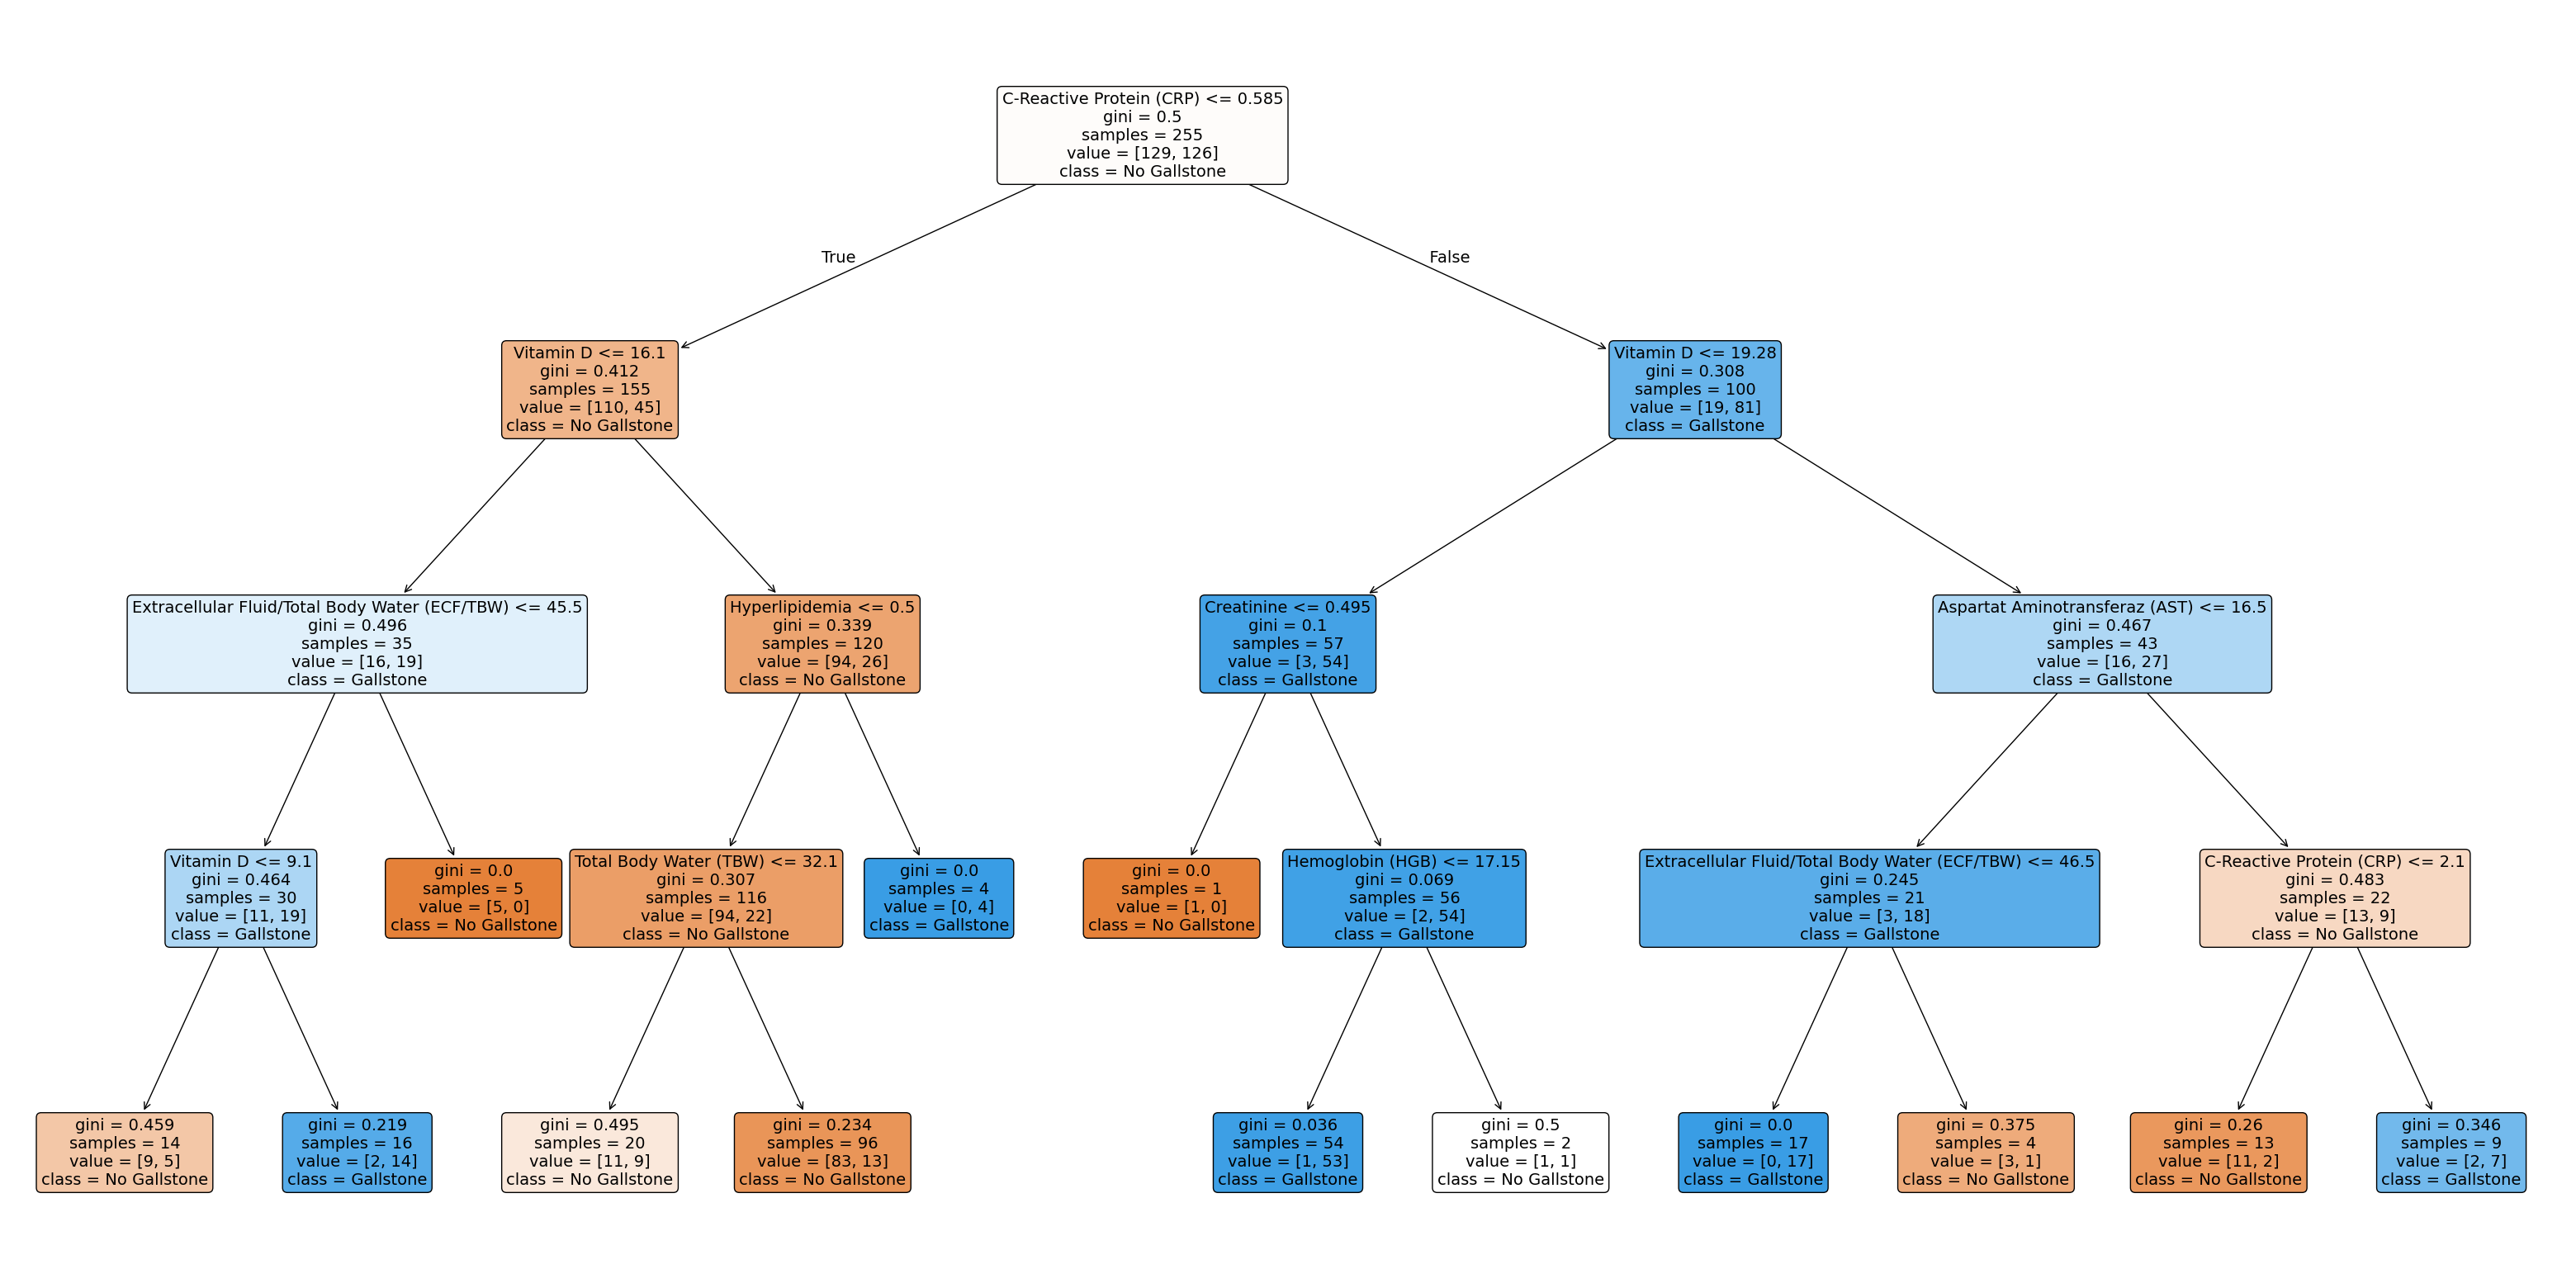

In [14]:
plt.figure(figsize=(40, 20))

plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=["No Gallstone", "Gallstone"],
    filled=True,
    rounded=True,
    fontsize=14
)

plt.show()


**Intepretation**

From the results above, out of all patients, the model is able classify 65.6% of the patients correctly. This implies that the model is better than random guessing (50%) but is not strong enough for clinical decision-making on itw own.  

The precision is 0.69, meaning that 7 out of 10 positive predictions are correct. This is acceptable for screeing but still produces unnecassry follow ups.

The recal is 0.56, meaning that the model detects only 56% of the gallstone cases and misses 44%. This is the weakest part of the model. F1-score is 0.62, which indicates a balance between recall and precision. A score of 0.62 indicates that the model has a moderate performance, confirming that the model is not aggressive in flagging the gallstone cases.

In general, the Decision Tree model achieved an accuracy of 65.6%. While specificity was moderate, sensitivity for gallstone detection was limited (56%), indicating a substantial proportion of false negatives. This suggests that the model may be more suitable as a screening tool rather than a standalone diagnostic method.